<a href="https://colab.research.google.com/github/JPReddy1234/Amazon_Sales_Analyzing/blob/main/Analysing_Amazon_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Working On Amazon Data **


1.What is the most selling Item Type?

2.Which are the most profitable Item Type?

3.Which Order priority sold the most?

4.Which are the Top 5 country by Units Sold?

5.Whether Offine or Online Which sales channel has been sold more

6.What is the Total Revenue by Year

7.What are the Trends Item wise by year

8.Which are the Top Regoins by Item Type?



In [ ]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime

In [ ]:
# Load the Dataset
df = pd.read_csv("/content/Amazon Sales data.csv")

# About the Dataset
Region        :Region of sales

Country       :Specific country

Item Type      :The category of the product sold

Sales Channesls:The method of sales ,either in offline or online

Order Priority :The priority level assigned to the order

Order Date     :The date the order was placed

Order ID       : A unique identifier for the product

Ship Date      :The date the order was shipped

Units sold     : The quantity of the product sold

Unit Price     : The selling price per unit of the product

Unit Cost: The cost price per unit of the product

Total Revenue: The totol revenue generated from the sale (Units sold * Unit Price)


Total Cost: The total cost incurred for the sale (Units sold * Unit Cost)

Total Profit: The total profit made from the sale (Total Revenue - Total cost)

In [ ]:
# Overview about the Dataset
print(df.shape,"\n")
print(df.dtypes,"\n")
print(df.info(),"\n")
print(df.head(5))

(100, 14) 

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit

# What is the structure of your Dataset?

There are 100 sales data in the above dataset with 14 features ('Region'.' Country','Item Type','Sales Channel', 'Order Priority','Order Date','Order ID','Ship Date', 'Units Sold','Unit Price','Unit Cost','Total Revenue', 'Total Cost','Total Profit')

Most of the varaibles are in numeric and some of variables like 'Order Date'and'Ship Date' they have wrong Data type instead of datetime


In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
df["Region"].unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [ ]:
df["Region"].value_counts()

Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64

In [ ]:
df["Country"].unique()


array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

In [ ]:
df["Country"].value_counts()

Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: count, Length: 76, dtype: int64

In [ ]:
df["Item Type"].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [ ]:
df["Item Type"].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

In [ ]:
df["Sales Channel"].unique()

array(['Offline', 'Online'], dtype=object)

In [ ]:
df["Sales Channel"].value_counts()

Sales Channel
Offline    50
Online     50
Name: count, dtype: int64

In [ ]:
df["Order Priority"].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

In [ ]:
df["Order Priority"].value_counts()

Order Priority
H    30
L    27
C    22
M    21
Name: count, dtype: int64

In [ ]:
# Changing order in the Dataset like Order Id in the first column
column = df.pop("Order ID")
df.insert(0,'Order ID',column)

In [ ]:
# Here i have taken index as Order ID
df.set_index('Order ID',inplace=True)

In [ ]:
# Descrptive Statistics for numeric variable
display(df.describe())

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
# check for Duplicates
df.duplicated().sum()

0

In [ ]:
# checking the null values
df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
# Converting the dataset into csv file
df.to_csv("Clean_Amazon_Sales_data.csv")

In [ ]:
df.head(20)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,
669165933,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
963881480,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
341417157,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
514321792,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
115456712,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
547995746,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
135425221,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
871543967,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
770463311,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20


1.which are the Most selling Items

In [ ]:
bought = df.groupby('Item Type').agg({'Units Sold':'sum'}).sort_values('Units Sold',ascending=False)[:10]
bought

,Units Sold
Item Type,
Cosmetics,83718
Clothes,71260
Beverages,56708
Fruits,49998
Personal Care,48708
Office Supplies,46967
Household,44727
Baby Food,40545
Cereal,25877


In [ ]:
print(bought.index)  # This should show the item types if they are set as the index
print(bought.columns)

Index(['Cosmetics', 'Clothes', 'Beverages', 'Fruits', 'Personal Care',
       'Office Supplies', 'Household', 'Baby Food', 'Cereal', 'Vegetables'],
      dtype='object', name='Item Type')
Index(['Units Sold'], dtype='object')


<ipython-input-25-4e77b9387e4f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Type', y='Units Sold', data=bought, palette='viridis')


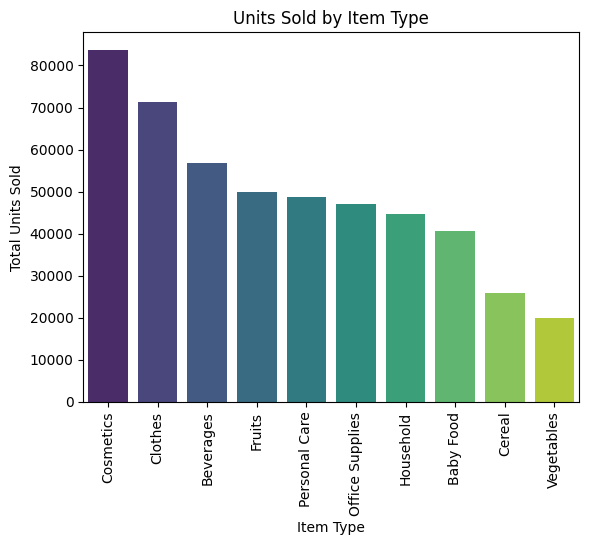

In [ ]:
sns.barplot(x='Item Type', y='Units Sold', data=bought, palette='viridis')
plt.xlabel('Item Type')
plt.ylabel('Total Units Sold')
plt.title('Units Sold by Item Type')
plt.xticks(rotation=90)
plt.show()

2.Which are the most profitable Item Type?


In [ ]:
profitable_items = df.groupby('Item Type').agg({'Total Profit':'sum'})
profitable_items.sort_values(['Total Profit'],inplace=True,ascending=False)
profitable_items.head(5)

,Total Profit
Item Type,
Cosmetics,14556048.66
Household,7412605.71
Office Supplies,5929583.75
Clothes,5233334.40
Baby Food,3886643.70


<ipython-input-27-a662643490ae>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Item Type",y="Total Profit", data=profitable_items.head(5), palette='viridis')


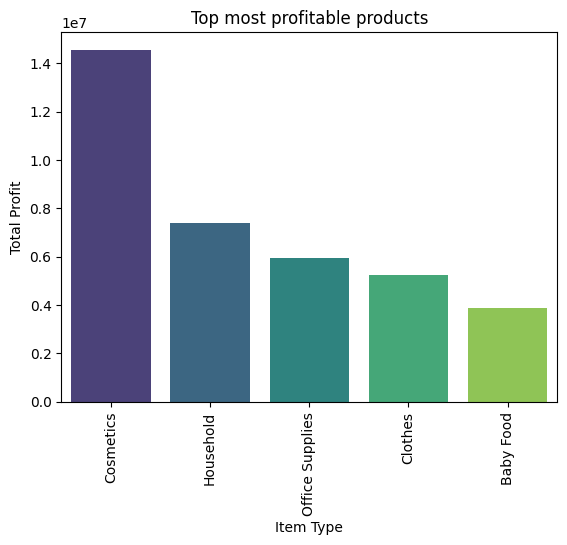

In [ ]:

sns.barplot(x="Item Type",y="Total Profit", data=profitable_items.head(5), palette='viridis')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.title('Top most profitable products')
plt.xticks(rotation=90)
plt.show()

3.Which Order priority sold the most?

In [ ]:
most_order_priority=df.groupby("Order Priority").agg({"Units Sold":"sum"})
most_order_priority.sort_values(["Units Sold"],inplace=True,ascending=False)
most_order_priority.head()

,Units Sold
Order Priority,
H,154212
L,146876
C,116951
M,94832


<ipython-input-29-6d108cfe8d64>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Priority',y="Units Sold",data=most_order_priority,palette='viridis')


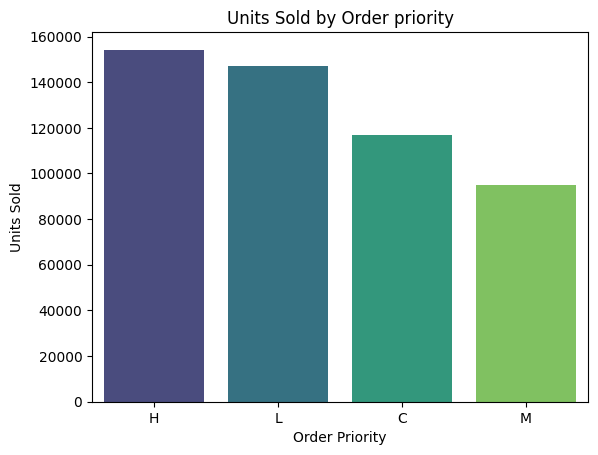

In [ ]:
sns.barplot(x='Order Priority',y="Units Sold",data=most_order_priority,palette='viridis')
plt.xlabel("Order Priority")
plt.ylabel("Units Sold")
plt.title("Units Sold by Order priority")
plt.show()

4.Which are the Top 5 country by Units Sold?

In [ ]:
countries = pd.DataFrame(df.groupby('Country').sum()['Units Sold'])
countries.sort_values(['Units Sold'],inplace=True,ascending = False)
countries.head(10)

,Units Sold
Country,
Sao Tome and Principe,24568
Djibouti,23198
Mexico,19143
The Gambia,14813
Myanmar,14180
Australia,12995
Norway,12574
Honduras,11199
Cameroon,10948


In [ ]:
df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

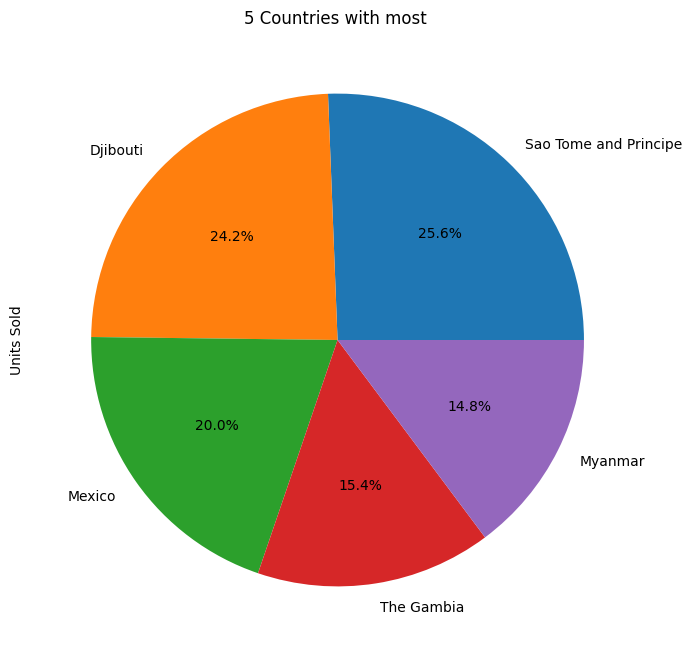

In [ ]:
countries=countries.sort_values(by = 'Units Sold',ascending = False)[:5]
countries['Units Sold'].plot(kind='pie',autopct='%1.1f%%',figsize=(8,8))
plt.title('5 Countries with most ')
plt.show()

Top 5 countries by Units Sold

1.Sao Tome and Principe

2.Djibouti

3.Mexico

4.The Gambia

5.Myanmar    

These are top 5 countries

In [ ]:
month = df['Order Date'].astype(str)
month = month.apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
df['month'] = month.map(lambda x: x.month)
df['year'] = month.map(lambda x: x.year)
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,month,year
Order ID,,,,,,,,,,,,,,,
669165933,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
963881480,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
341417157,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
514321792,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
115456712,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512878119,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72,7,2011
810711038,Asia,Malaysia,Fruits,Offline,L,11/11/2011,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,11,2011
728815257,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,6,2016


In [ ]:
# @title
date = df.groupby(['year','month']).sum()
date

Region  \
year month                                                      
2010 2                     Middle East and North AfricaEurope   
     5                Australia and OceaniaSub-Saharan Africa   
     6                                  Australia and Oceania   
     10                    Middle East and North AfricaEurope   
     11                                                Europe   
     12                                            AsiaEurope   
2011 1                   Sub-Saharan AfricaSub-Saharan Africa   
     2                      Central America and the Caribbean   
     4                                     Sub-Saharan Africa   
     5                                     Sub-Saharan Africa   
     6                                                   Asia   
     7                                     Sub-Saharan Africa   
     9                                                   Asia   
     11     Middle East and North AfricaSub-Saharan Africa...   
2012 1                               Sub-Saharan AfricaEurope   
     2                  EuropeNorth AmericaSub-Saharan Africa   
     3                                     Sub-Saharan Africa   
     4                 EuropeAsiaMiddle East and North Africa   
     5                               Sub-Saharan AfricaEurope   
     6      Sub-Saharan AfricaSub-Saharan AfricaMiddle Eas...   
     7      Sub-Saharan AfricaAustralia and OceaniaSub-Sah...   
     8                      Central America and the Caribbean   
     9                     EuropeMiddle East and North Africa   
     10                                          EuropeEurope   
2013 2                                     Sub-Saharan Africa   
     3                           Middle East and North Africa   
     4                                                   Asia   
     6                            Australia and OceaniaEurope   
     7      Middle East and North AfricaAustralia and Oceania   
     8                                     Sub-Saharan Africa   
     9                                     Sub-Saharan Africa   
     10     Central America and the CaribbeanSub-Saharan A...   
     12                                    Sub-Saharan Africa   
2014 2                                 AsiaSub-Saharan Africa   
     4                   Sub-Saharan AfricaSub-Saharan Africa   
     5                                           EuropeEurope   
     6                                     Sub-Saharan Africa   
     7                            EuropeAustralia and Oceania   
     8                                     Sub-Saharan Africa   
     9                                  Australia and Oceania   
     10      Australia and OceaniaEuropeAustralia and Oceania   
     11                                         North America   
2015 1                                                   Asia   
     2                            Australia and OceaniaEurope   
     4                   Sub-Saharan AfricaSub-Saharan Africa   
     7                  Sub-Saharan AfricaEuropeNorth America   
     8                           Middle East and North Africa   
     10                                 Australia and Oceania   
     11                                                  Asia   
2016 3                                     Sub-Saharan Africa   
     5                                                 Europe   
     6      Central America and the CaribbeanSub-Saharan A...   
     7                      Central America and the Caribbean   
     10                                                Europe   
     11                      AsiaMiddle East and North Africa   
     12                              EuropeSub-Saharan Africa   
2017 1                                 AsiaSub-Saharan Africa   
     2      Central America and the CaribbeanSub-Saharan A...   
     3                                     Sub-Saharan Africa   
     5      EuropeCentral America and the CaribbeanSub-Sah...   

                        

<ipython-input-35-de1bea4364eb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="year",y="Units Sold",data=date,palette='viridis')


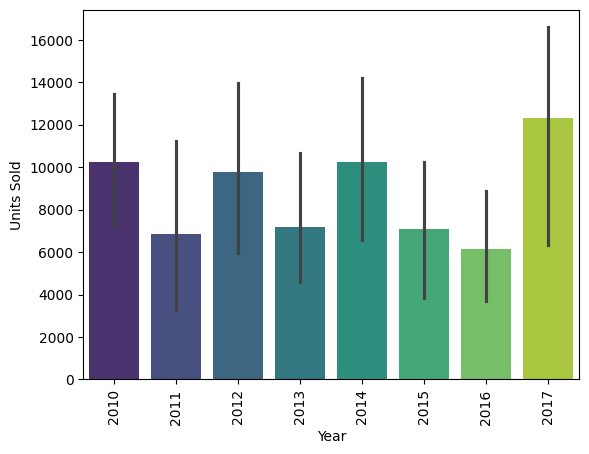

In [ ]:
sns.barplot(x="year",y="Units Sold",data=date,palette='viridis')
plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,month,year
Order ID,,,,,,,,,,,,,,,
669165933,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
963881480,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
341417157,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
514321792,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
115456712,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013


5.Whether Offine or Online Which sales channel has been sold more

In [ ]:
sales_channel=df.groupby("Sales Channel").agg({"Units Sold":"sum"})
sales_channel.sort_values(["Units Sold"],inplace=True,ascending=True)
sales_channel.head()

,Units Sold
Sales Channel,
Online,236089
Offline,276782


<ipython-input-38-0e06aaac9e62>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales Channel",y="Units Sold",data=sales_channel,palette='viridis')


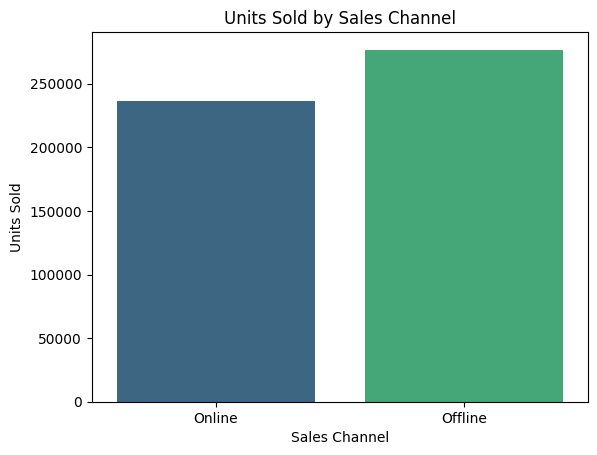

In [ ]:
sns.barplot(x="Sales Channel",y="Units Sold",data=sales_channel,palette='viridis')
plt.xlabel("Sales Channel")
plt.ylabel("Units Sold")
plt.title("Units Sold by Sales Channel")
plt.show()

6.What is the Total Revenue by Year

In [ ]:
Revenue=df.groupby("year").agg({"Total Revenue":"sum"})
Revenue.sort_values(["Total Revenue"],inplace=True,ascending=True)
Revenue.head()

,Total Revenue
year,
2011,11129166.07
2016,12372867.22
2015,12427982.86
2017,13373419.63
2014,16630214.43


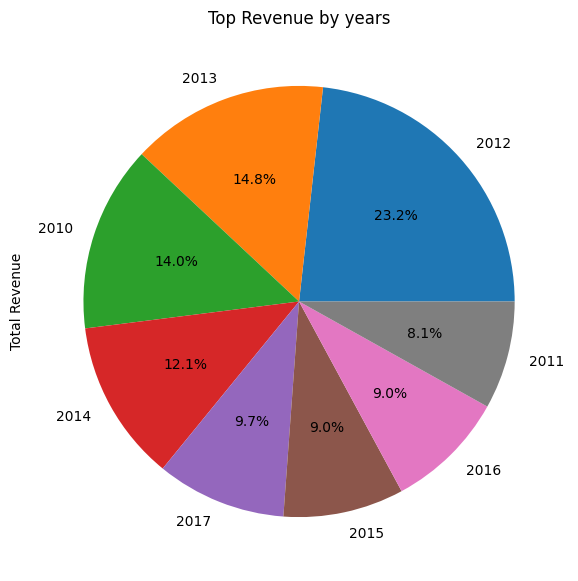

In [ ]:
Revenue = Revenue.sort_values(by ='Total Revenue',ascending = False)
Revenue['Total Revenue'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('Top Revenue by years')
plt.show()

7.What are the Trends Item wise by year

In [ ]:
items_trends = df.groupby(['Item Type','year']).agg({'Total Revenue':'sum'}).reset_index()
items_trends = items_trends.sort_values(['Total Revenue','year'],ascending=False)
pivot_items_trends=items_trends.pivot(index='year',columns='Item Type',values='Total Revenue')
pivot_items_trends = pivot_items_trends.fillna(0)
top_items_each_year = pivot_items_trends.idxmax(axis=1)
print(top_items_each_year)


year
2010          Cosmetics
2011    Office Supplies
2012    Office Supplies
2013          Cosmetics
2014          Household
2015          Household
2016          Cosmetics
2017          Household
dtype: object


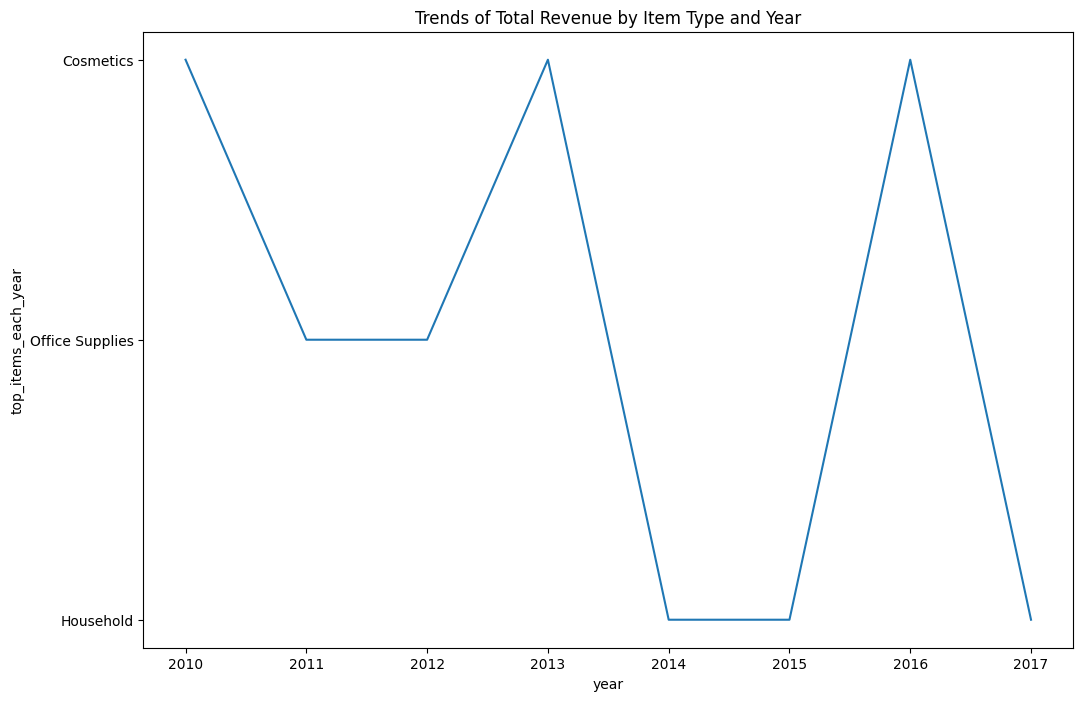

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=top_items_each_year)
plt.title('Trends of Total Revenue by Item Type and Year')
plt.xlabel('year')
plt.ylabel('top_items_each_year')
plt.show()

8.Which are the Top Regoins by Item Type?

In [ ]:
regions = df.groupby(['Region']).agg({'Units Sold':'sum'})
regions.sort_values(['Units Sold'],inplace=True,ascending=False)
top5_regions = regions.head(5)
regions.head()

,Units Sold
Region,
Sub-Saharan Africa,182870
Europe,98117
Australia and Oceania,68325
Asia,59967
Middle East and North Africa,48678


<ipython-input-44-1bfcd8a85d5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region',y='Units Sold',data=top5_regions,palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

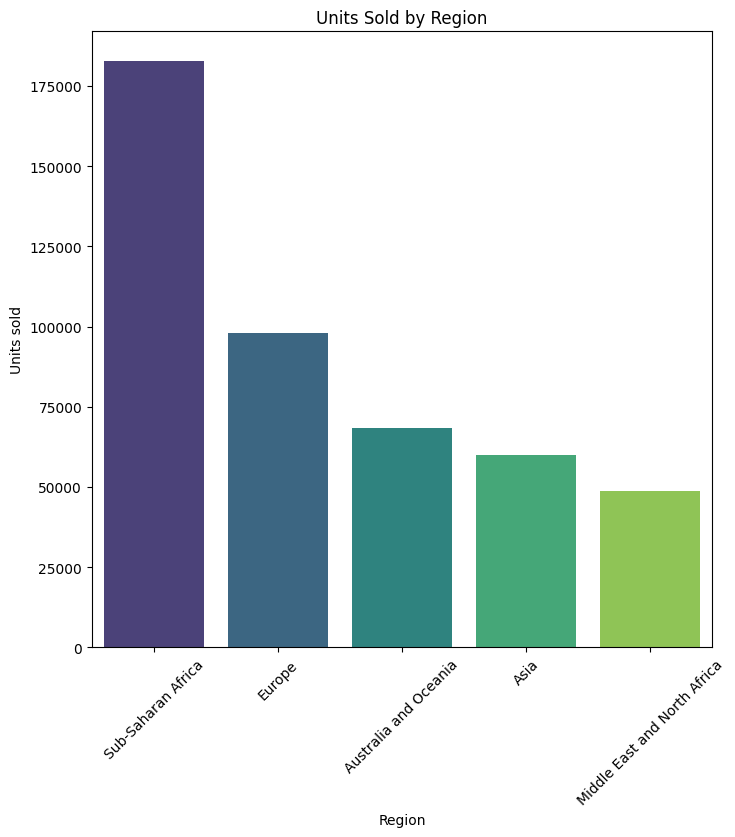

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Region',y='Units Sold',data=top5_regions,palette='viridis')
plt.xlabel('Region')
plt.ylabel('Units sold')
plt.title('Units Sold by Region')
plt.xticks(rotation = 45)
plt.show

In [49]:
# Final_Amazon_Data
df.to_csv("Final_Amazon_Sales_data.csv")